In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [43]:
np.random.seed(4242)

In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 

In [45]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper

In [46]:
adv_df = pd.read_csv('https://raw.githubusercontent.com/cmhamakawa/Data_Science_NBA_Project/master/Datasets/preprocessed_nba_dataset(w_years_of_exp).csv')
adv_df.head()

,Unnamed: 0,SalStartYr,Salary,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,years_of_exp,salary_cap,Per_of_Salary_Cap
0,7454,2001,5062500.0,12.0,14.5,1.5,3.8,0.387,0.1,0.3,0.400,1.3,3.5,0.386,0.405,0.7,1.2,0.583,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,4,42500000,0.119118
1,7455,2001,11250000.0,81.0,40.0,7.5,15.8,0.472,0.1,0.8,0.188,7.3,15.0,0.487,0.477,5.5,6.6,0.834,2.2,6.9,9.1,3.1,1.1,1.0,2.9,2.9,20.5,5,42500000,0.264706
2,7456,2001,1995741.0,0.0,8.7,0.7,2.2,0.321,0.2,0.6,0.250,0.5,1.5,0.350,0.357,0.5,0.7,0.667,0.0,1.0,1.0,1.4,0.6,0.0,1.0,1.1,2.0,6,42500000,0.046959
3,7457,2001,1418400.0,24.0,21.3,3.7,8.8,0.417,0.3,0.7,0.370,3.4,8.1,0.421,0.432,1.9,2.3,0.820,0.6,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,1,42500000,0.033374
4,7458,2001,11250000.0,82.0,38.2,7.7,16.0,0.480,2.5,5.7,0.433,5.2,10.3,0.506,0.557,4.2,4.8,0.888,1.2,4.0,5.2,4.6,1.5,0.2,2.5,2.3,22.0,5,42500000,0.264706


In [47]:
adv_df.drop(adv_df.columns[0], axis = 1, inplace = True)

In [48]:
# getting subset of data which we deemed to be our best columns as predictors of salary
christine_subset = adv_df[['FG', 'FTA', 'AST', 'TRB', 'PTS', 'BLK', 'years_of_exp','Salary','SalStartYr','TOV']]

In [49]:
# getting rookies
christine_subset = christine_subset[christine_subset['years_of_exp'] == 1]

In [84]:
christine_subset.size

9669

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
christine_subset['SalStartYr'] = le.fit_transform(christine_subset['SalStartYr'])

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as pl

In [53]:
# getting salary data to be used for clustering
to_elbow = pd.DataFrame(christine_subset['Salary'])

In [54]:
distortions = []
inertias = []

K = range(1, 10)
 
# testing different clustering values
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(to_elbow)
    kmeanModel.fit(to_elbow)
 
    distortions.append(sum(np.min(cdist(to_elbow, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / to_elbow.shape[0])
    
    inertias.append(kmeanModel.inertia_)

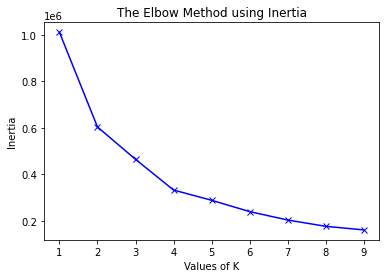

In [55]:
# plotting the values to determine point of inflection aka the "elbow" of the graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [56]:
# 4 seemed to be optimal according to the above graph
kmeans=KMeans(n_clusters=4,random_state=1)

In [57]:
kmeans.fit(to_elbow)

KMeans(n_clusters=4, random_state=1)

In [58]:
to_elbow['Cluster'] = kmeans.labels_

In [59]:
to_elbow['Cluster'].unique()

array([0, 3, 2, 1], dtype=int32)

In [60]:
to_elbow.shape

(879, 2)

In [61]:
# adding cluster number column to the original data set
christine_subset['Cluster'] = to_elbow['Cluster']

In [62]:
christine_subset.tail()

,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,Salary,SalStartYr,TOV,Cluster
6205,1.0,0.9,0.8,1.7,3.1,0.1,1,1445697.0,19,0.3,0
6206,0.5,0.2,1.0,0.6,1.1,0.1,1,449115.0,19,0.5,3
6208,4.8,2.0,2.7,3.5,13.2,0.1,1,5572680.0,19,1.7,1
6212,1.3,0.8,1.0,2.6,3.4,0.5,1,2498760.0,19,0.7,2
6214,8.8,7.4,2.1,6.3,22.5,0.4,1,10245480.0,19,2.5,1


# How Well Can I Predict Clusters?

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [65]:
# setting up predictor and target data 
X = christine_subset.drop(columns = ['Cluster','Salary'], axis = 1)
y = christine_subset[['Cluster']]

In [66]:
X.head()

,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,SalStartYr,TOV
3,3.7,2.3,1.0,2.2,9.5,0.1,1,0,1.2
43,0.7,1.2,0.2,1.5,2.1,0.1,1,0,0.6
50,2.1,1.8,2.7,1.7,5.4,0.0,1,0,1.8
53,1.2,1.0,0.3,1.6,3.1,0.1,1,0,0.5
55,1.8,0.6,2.3,1.5,4.6,0.2,1,0,1.4


In [67]:
# splitting into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Logistic Regression

In [68]:
LR = LogisticRegression()
cross_val_score(LR, X_train, y_train, cv = 5).mean()

0.5786163522012578

In [69]:
c_vals = np.linspace(0, 3, 10)
c_vals

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

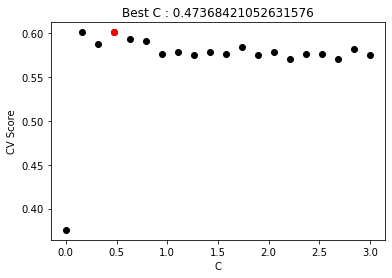

In [70]:
fig, ax = plt.subplots(1)

best_score = 0
best_c = 0

# c_vals from 0-10
c_vals = np.linspace(0, 3, 20)

# loop through possible c_vals
for c_val in c_vals:
    
    # evaluate the model with the current c_val
    LR = LogisticRegression(C = c_val)
    cv_score = cross_val_score(LR, X_train, y_train, cv=5).mean()
    ax.scatter(c_val, cv_score, color = "black")
    
    # check if we've beaten our previous score
    if cv_score > best_score:
        best_c = c_val
        best_score = cv_score

l = ax.set(title = "Best C : " + str(best_c),
       xlabel = "C", 
       ylabel = "CV Score")
ax.scatter(best_c, best_score, color = "red")

In [83]:
LR = LogisticRegression(C = best_c)
LR.fit(X_train, y_train)
print(LR.score(X_train,y_train),LR.score(X_test, y_test))

0.6223908918406073 0.5113636363636364


# Decision Trees

In [72]:
T = DecisionTreeClassifier(max_depth = 2)
cross_val_score(T, X_train, y_train, cv=5).mean()

0.5634860736747529

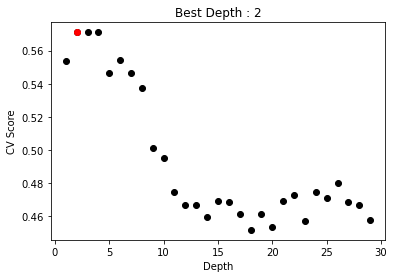

In [73]:
fig, ax = plt.subplots(1)

best_score = 0

# cross validation for each of the possible model depths 1-30
for d in range(1,30):
    T = DecisionTreeClassifier(max_depth = d)
    # Average cv_score acheived in cross validation
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    # plot avg cv_score (in black)
    ax.scatter(d, cv_score, color = "black")
    # identify the best possible depth by cv_score
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

#highlight the best depth, best score value in red
ax.scatter(best_depth, best_score, color = "red")

# show best depth in title 
# plot tells us the depth that acheived the best score under cross validation 
# we now have a good estimate about the optimal depth/complexity of model
l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

In [74]:
T = DecisionTreeClassifier(max_depth = best_depth)
T.fit(X_train, y_train)
T.score(X_train, y_train), T.score(X_test, y_test)

(0.5863377609108159, 0.5170454545454546)

# Random Forests

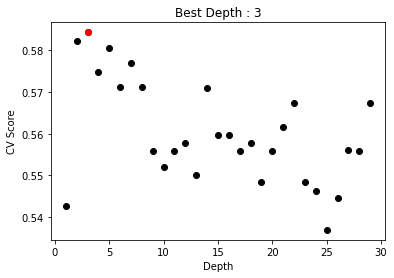

In [79]:
from sklearn.ensemble import RandomForestClassifier

fig, ax = plt.subplots(1)

best_score = 0

# cross validation for each of the possible model depths 1-30
for d in range(1,30):
    T = RandomForestClassifier(max_depth = d)
    # Average cv_score acheived in cross validation
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    # plot avg cv_score (in black)
    ax.scatter(d, cv_score, color = "black")
    # identify the best possible depth by cv_score
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

#highlight the best depth, best score value in red
ax.scatter(best_depth, best_score, color = "red")

# show best depth in title 
# plot tells us the depth that acheived the best score under cross validation 
# we now have a good estimate about the optimal depth/complexity of model
l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

In [80]:
T = RandomForestClassifier(max_depth = best_depth)
T.fit(X_train,y_train)
print(T.score(X_train,y_train),T.score(X_test,y_test))

0.650853889943074 0.5227272727272727


# Support Vector Machine

In [81]:
from sklearn import svm
vector = svm.SVC()
vector.fit(X_train,y_train)

SVC()

In [82]:
print(vector.score(X_train,y_train),vector.score(X_test,y_test))

0.6053130929791272 0.5056818181818182
